In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pylab as pl
import os
import plotly
from fiona.crs import from_epsg
from geopandas.tools import sjoin

% pylab inline

Populating the interactive namespace from numpy and matplotlib


# School Coordinates

In [2]:
# Read in file
schools = gpd.read_file('data/Schools_shape/Public_Schools_Points_2011-2012A.shp')

# Drop Irrlevant columns
schools = schools[['ATS_CODE', 'LOC_CODE', 'SCHOOLNAME', 'SCH_TYPE',
                   'GEO_DISTRI', 'ADMIN_DIST', 'ADDRESS', 'GRADES', 
                   'geometry']]

# Ensure CRS correct
schools = schools.to_crs(epsg=4326)

# format important types correctly
schools.ATS_CODE = schools.ATS_CODE.str.strip()

In [3]:
schools.head()

,ATS_CODE,LOC_CODE,SCHOOLNAME,SCH_TYPE,GEO_DISTRI,ADMIN_DIST,ADDRESS,GRADES,geometry
0,15K001,K001,P.S. 001 THE BERGEN,Elementary,15,15,309 47 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-74.01176589685977 40.64915359571093)
1,17K002,K002,M.S. 002,Junior High-Intermediate-Middle,17,17,655 PARKSIDE AVENUE,"06,07,08,SE",POINT (-73.95121806510498 40.65642068697073)
2,21K095,K095,P.S. 095 THE GRAVESEND,K-8,21,21,345 VAN SICKLEN STREET,"PK,0K,01,02,03,04,05,06,07,08,SE",POINT (-73.97488433380776 40.59574496207723)
3,21K096,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,21,21,99 AVENUE P,"06,07,08,SE",POINT (-73.98491098572096 40.60778712848697)
4,21K097,K097,P.S. 97 THE HIGHLAWN,Elementary,21,21,1855 STILLWELL AVENUE,"PK,0K,01,02,03,04,05,SE",POINT (-73.98575731504725 40.60125352010608)


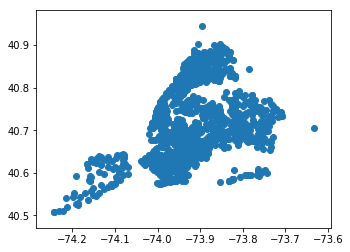

In [4]:
schools.plot()

# School Districts Shape


In [5]:
# Read in School District Data
schoolDistricts = gpd.read_file('data/SchoolsDistrict_shape/geo_export_08a52168-d8a7-435a-ad0b-37aaf58f5b41.shp')

# Drop Irelevant comments
schoolDistricts = schoolDistricts[['school_dis', 'geometry']]

# Preview
schoolDistricts.head()

,school_dis,geometry
0,16.0,POLYGON ((-73.93311862859143 40.69579115384632...
1,32.0,POLYGON ((-73.91180710069435 40.70343495202662...
2,10.0,POLYGON ((-73.86789798628736 40.90294017690526...
3,7.0,(POLYGON ((-73.89680883223774 40.7958084451597...
4,23.0,(POLYGON ((-73.92044366203014 40.6656262871675...


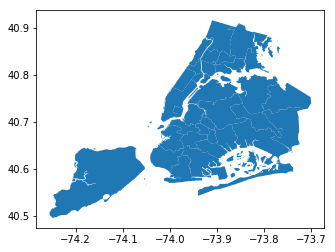

In [6]:
schoolDistricts.plot()

# School Zones
It is important to note that School Zones change relatively frequently, we may need to consider this for analysis?

In [7]:
# REad in different levels
HighSZ = gpd.read_file('data/SchoolsZone_shape/geo_export_394f495f-226e-43c1-b599-80278be59b81.shp')
MiddleSZ = gpd.read_file('data/SchoolsZone_shape/geo_export_ca60dd0f-07d8-4424-bfe7-0be94ed7ee0e.shp')
ElementarySZ = gpd.read_file('data/SchoolsZone_shape/geo_export_290abab7-d424-4649-b1ed-cd12a90bb0ba.shp')

# Drop Ireelevant Columns
HighSZ = HighSZ[['hsid_no', 'geometry']]
MiddleSZ = MiddleSZ[['msid_no', 'schooldist', 'geometry']] # Maybe get rid of schooldist as well
ElementarySZ = ElementarySZ[['esid_no','schooldist', 'geometry']] # Maybe get rid of schooldist as well

# Drop null valuyes 
ElementarySZ.dropna(inplace=True)

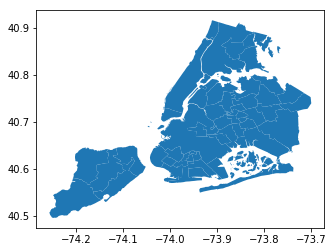

In [8]:
HighSZ.plot()

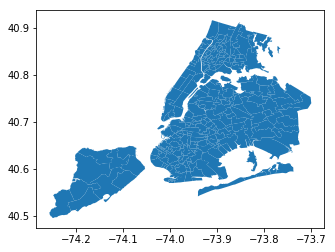

In [9]:
MiddleSZ.plot()

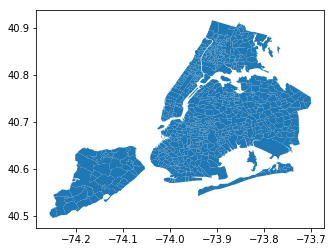

In [10]:
ElementarySZ.plot()

# SCHMA
Need to import the data manually due to confidentiality

In [11]:
# Read in data
SHMA = pd.read_csv('data/schma19962016.csv')

# Preview
SHMA.head()

/nfshome/adn323/.conda/envs/Python3_adn323/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (124,125,126,148,149,150,183,220,221,222,226,227,230,231,232,234,235,247) have mixed types. Specify dtype option on import or set low_memory=False.



,DBN,SCHNAM,YEAR,SCHLEV,SCHLEV5,SCHS219962016,XDBN,XDBN_FLAG,ENRNUMPRK,ENRNUMKID,...,BNLONG_YRFIRST,BNLONG_YRLAST,BNLONG_TOTALYRS,BNLONG_PHASEDOUT19962016,BNLONG_PHASEDIN19962016,BNLONG_CONTOPERATE19962016,CBO,HSJHS,HSSCHSAMP2,SPECHS
0,00M801,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M801,0,16,48,...,1996,1998,3.0,1,0,0,0,NaN,6,0
1,00M802,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M802,0,0,0,...,1996,1998,3.0,1,0,0,0,1.0,6,0
2,00M803,HUNTER SCHOOL,1996,NaN,NaN,NaN,00M803,0,0,0,...,1996,1998,3.0,1,0,0,0,0.0,6,0
3,01M015,ROBERTO CLEMENTE,1996,NaN,NaN,NaN,01M015,0,0,36,...,1996,2016,21.0,0,0,0,0,NaN,6,0
4,01M019,ASHER LEVY,1996,NaN,NaN,NaN,01M019,0,33,82,...,1996,2016,21.0,0,0,0,0,NaN,6,0


# Unique Schools List
Create unique schools list

In [12]:
# Create list of schools
SchoolsList = SHMA[['DBN','SCHNAM','XDBN']].drop_duplicates()

# Ensure no white space before or after strings
SchoolsList.DBN = SchoolsList.DBN.str.strip()

# Preview
SchoolsList.head()

,DBN,SCHNAM,XDBN
0,00M801,HUNTER SCHOOL,00M801
1,00M802,HUNTER SCHOOL,00M802
2,00M803,HUNTER SCHOOL,00M803
3,01M015,ROBERTO CLEMENTE,01M015
4,01M019,ASHER LEVY,01M019


In [13]:
SchoolsList.shape

(3479, 3)

In [14]:
schools.head()

,ATS_CODE,LOC_CODE,SCHOOLNAME,SCH_TYPE,GEO_DISTRI,ADMIN_DIST,ADDRESS,GRADES,geometry
0,15K001,K001,P.S. 001 THE BERGEN,Elementary,15,15,309 47 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-74.01176589685977 40.64915359571093)
1,17K002,K002,M.S. 002,Junior High-Intermediate-Middle,17,17,655 PARKSIDE AVENUE,"06,07,08,SE",POINT (-73.95121806510498 40.65642068697073)
2,21K095,K095,P.S. 095 THE GRAVESEND,K-8,21,21,345 VAN SICKLEN STREET,"PK,0K,01,02,03,04,05,06,07,08,SE",POINT (-73.97488433380776 40.59574496207723)
3,21K096,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,21,21,99 AVENUE P,"06,07,08,SE",POINT (-73.98491098572096 40.60778712848697)
4,21K097,K097,P.S. 97 THE HIGHLAWN,Elementary,21,21,1855 STILLWELL AVENUE,"PK,0K,01,02,03,04,05,SE",POINT (-73.98575731504725 40.60125352010608)


In [15]:
print(schools.shape)
print(schools.ATS_CODE.unique().shape)

(1709, 9)
(1708,)


In [16]:
print(SchoolsList.shape)
print(SchoolsList.DBN.unique().shape)

(3479, 3)
(2144,)


# Merging with Spatial Data to find out Different groupings

In [17]:
# Merge data with coordinates
SchoolsList_ = pd.merge(SchoolsList, schools, left_on='DBN', right_on='ATS_CODE', how="left")

###############################################################################

### Missing Scholls
# CReate Missing Schools List without Coordinates
missing_schools = SchoolsList_[['DBN','SCHNAM']][SchoolsList_['ATS_CODE'].isnull()]
# Save to CSV
missing_schools.to_csv('MissingSchools.csv')

###############################################################################

# Remove Null Values
SchoolsList_.dropna(inplace=True) # Remove once we get the rest of the coords

# Convert to GeodAtaframe
SchoolsList_ = gpd.GeoDataFrame(SchoolsList_, crs=4326, geometry=SchoolsList_.geometry)

In [19]:
# Spatially Join all zones for easy mapping
SchoolsList_ = sjoin(SchoolsList_, schoolDistricts)
SchoolsList_.drop(['index_right'],axis=1, inplace=True)
SchoolsList_ = sjoin(SchoolsList_, HighSZ)
SchoolsList_.drop(['index_right'],axis=1, inplace=True)
SchoolsList_ = sjoin(SchoolsList_, MiddleSZ)
SchoolsList_.drop(['index_right'],axis=1, inplace=True)
SchoolsList_.rename(columns={'schooldist':'schooldist_ms'},inplace=True)
SchoolsList_ = sjoin(SchoolsList_, ElementarySZ)
SchoolsList_.drop(['index_right'],axis=1, inplace=True)
SchoolsList_.rename(columns={'schooldist':'schooldist_es'},inplace=True)

In [20]:
SchoolsList_

,DBN,SCHNAM,XDBN,ATS_CODE,LOC_CODE,SCHOOLNAME,SCH_TYPE,GEO_DISTRI,ADMIN_DIST,ADDRESS,GRADES,geometry,school_dis,hsid_no,msid_no,schooldist_ms,esid_no,schooldist_es
3,01M015,ROBERTO CLEMENTE,01M015,01M015,M015,P.S. 015 ROBERTO CLEMENTE,Elementary,1.0,1.0,333 EAST 4 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-73.97881143093531 40.72189107721137),1.0,4.0,81.0,1.0,502.0,0.0
4,01M019,ASHER LEVY,01M019,01M019,M019,P.S. 019 ASHER LEVY,Elementary,1.0,1.0,185 1 AVENUE,"PK,0K,01,02,03,04,05,SE",POINT (-73.98417971283783 40.72973959016596),1.0,4.0,81.0,1.0,502.0,0.0
8,01M034,FRANKLIN D. ROOSEVELT,01M034,01M034,M034,P.S. 034 FRANKLIN D. ROOSEVELT,K-8,1.0,1.0,730 EAST 12 STREET,"PK,0K,01,02,03,04,05,06,07,08,SE",POINT (-73.97522068045815 40.72626637759851),1.0,4.0,81.0,1.0,502.0,0.0
12,01M063,WILLIAM MCKINLEY,01M063,01M063,M063,P.S. 063 WILLIAM MCKINLEY,Elementary,1.0,1.0,121 EAST 3 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-73.98633972068826 40.72443612515693),1.0,4.0,81.0,1.0,502.0,0.0
13,01M064,ROBERT SIMON,01M064,01M064,M064,P.S. 064 ROBERT SIMON,Elementary,1.0,1.0,600 EAST 6 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-73.98154865385682 40.72419613342007),1.0,4.0,81.0,1.0,502.0,0.0
21,01M450,EAST SIDE COMMUNITY HIGH SCHOO,01M450,01M450,M450,EAST SIDE COMMUNITY HIGH SCHOOL,Secondary School,1.0,1.0,420 EAST 12 STREET,"06,07,08,09,10,11,12,SE",POINT (-73.9823585548357 40.72925622359198),1.0,4.0,81.0,1.0,502.0,0.0
1061,75M094,P094M @ P196M,75M094,75M094,M094,P.S. M094,K-8,1.0,75.0,442 EAST HOUSTON STREET,"0K,01,02,03,04,05,06,07,08,SE",POINT (-73.97760747231418 40.71978878309029),1.0,4.0,81.0,1.0,502.0,0.0
1070,75M751,MANHATTAN SCHOOL FOR CAREER DE,75M751,75M751,M751,MANHATTAN SCHOOL FOR CAREER DEVELOPMENT,High school,1.0,75.0,113 EAST 4TH STREET,"08,09,10,11,12,SE",POINT (-73.98788842841793 40.72571968834871),1.0,4.0,81.0,1.0,502.0,0.0
1402,01M188,ISLAND SCHOOL/PS 188,01M188,01M188,M188,P.S. 188 THE ISLAND SCHOOL,K-8,1.0,1.0,442 EAST HOUSTON STREET,"PK,0K,01,02,03,04,05,06,07,08,SE",POINT (-73.97744358723909 40.72001158063921),1.0,4.0,81.0,1.0,502.0,0.0
1560,01M315,THE EAST VILLAGE COMMUNITY SCH,01M315,01M315,M315,THE EAST VILLAGE COMMUNITY SCHOOL,Elementary,1.0,1.0,610 EAST 12 STREET,"PK,0K,01,02,03,04,05,SE",POINT (-73.97857615945132 40.72774773539502),1.0,4.0,81.0,1.0,502.0,0.0


# Maybe for later

In [ ]:
Schools Directory
https://data.cityofnewyork.us/api/views/7crd-d9xh/rows.csv?accessType=DOWNLOAD